This notebook examines the basic stats and shape of the data.

## Currently it needs to be updated and organized

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import re

Import the cleaned data:

In [63]:
now = 'temp'

In [64]:
X_train = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now), index_col = ['artist'])
y_train = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now), index_col = ['artist'])

In [65]:
X_train.head()

,genrelist,genrelist_length
artist,,
Trish_Thuy_Trang,"['Pop_music', 'Techno', 'Dance_music']",3
Dougie_Young,['Country_music'],1
Bruce_Kulick,"['Hard_rock', 'Heavy_metal_music']",2
Steve_Vawamas,"['Neoclassical_metal', 'Hard_rock', 'Heavy_met...",3
Will_Schwartz,"['Indie_pop', 'Indie_rock', 'Alt-Rock', 'Elect...",4


In [66]:
X_train.shape, y_train.shape

((11692, 2), (11692, 1))

In [67]:
data = y_train.join( [X_train], how = 'outer')

In [68]:
data.head()

,gender,genrelist,genrelist_length
artist,,,
Trish_Thuy_Trang,female,"['Pop_music', 'Techno', 'Dance_music']",3
Dougie_Young,male,['Country_music'],1
Bruce_Kulick,male,"['Hard_rock', 'Heavy_metal_music']",2
Steve_Vawamas,male,"['Neoclassical_metal', 'Hard_rock', 'Heavy_met...",3
Will_Schwartz,male,"['Indie_pop', 'Indie_rock', 'Alt-Rock', 'Elect...",4


In [69]:
data.shape, data.isnull().sum()

((11692, 3),
 gender              0
 genrelist           0
 genrelist_length    0
 dtype: int64)

### Genre Labels

Each value of the genre column is a _string_ of comma separated genre labels using the spotify abbreviations. We want to convert it to a _list_ of strings.

In [71]:
"""This function takes in a string of the form
appearing in the genrelist of the dataframe.
It strips the square brackets and extra quotes and
returns a list of strings where each string is a genre label."""
def genrelist(string):
    string = string.strip("[").strip("]").replace("'","")
    L = [s for s in string.split(',')]
    L_new = []
    for x in L:
        L_new.append(x.replace(" ","_").lstrip("_").rstrip("_"))
    while (str("") in L_new):
        L_new.remove("")
    return L_new

Now we apply it to the whole column and put the lists in a new column:

In [72]:
data['genrelist']= data['genrelist'].apply(genrelist)

In [73]:
data.head()

,gender,genrelist,genrelist_length
artist,,,
Trish_Thuy_Trang,female,"[Pop_music, Techno, Dance_music]",3
Dougie_Young,male,[Country_music],1
Bruce_Kulick,male,"[Hard_rock, Heavy_metal_music]",2
Steve_Vawamas,male,"[Neoclassical_metal, Hard_rock, Heavy_metal_mu...",3
Will_Schwartz,male,"[Indie_pop, Indie_rock, Alt-Rock, Electronic_d...",4


Extract unique genre labels:

In [74]:
genre_list = data.genrelist.values.tolist()
genre_list = [x for y in genre_list for x in y]
genre_list = list(set(genre_list))

In [97]:
genre_list[:5]

['Goth_rock', 'Bossa_Nova', 'Medieval_music', 'West_coast_rap', 'Anison']

In [98]:
len(genre_list)

1616

In [99]:
print('There are {} artists with genre and binary-gender labels.'.format(data.shape[0]))
print('There are {} unique genre labels.'.format(len(genre_list)))

There are 11692 artists with genre and binary-gender labels.
There are 1616 unique genre labels.


In [76]:
data_male = data[data.gender == 'male']
data_female = data[data.gender == 'female']

In [77]:
tot = data.shape[0]
m = data_male.shape[0]
f = data_female.shape[0]
print('{} total artists'.format(tot))
print('{} female artists, or {:0.0f}%'.format(f, 100*f/(f+m)))
print('{} male artists, or {:0.0f}%'.format(m, 100*m/(f+m)))

11692 total artists
3607 female artists, or 31%
8085 male artists, or 69%


Count the min, mean, max of number of genres for male and female artists:

In [79]:
data_female = data[data.gender == 'female']
n = data_female.shape[0]
a,b,c = data_female.genrelist_length.mean(), data_female.genrelist_length.std(), data_female.genrelist_length.max()
print('Female:')
print(f'{n} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Female:
3607 Artists.
Mean number of genre labels: 2.56.
STD of the number of genre labels: 1.5.
Max number of genre labels: 11.


In [55]:
# plt.hist(data_female.num_genres, bins = 25, density = True)
# plt.show()

In [80]:
data_male = data[data.gender == 'male']
m = data_male.shape[0]
a,b,c = data_male.genrelist_length.mean(), data_male.genrelist_length.std(), data_male.genrelist_length.max()
print('Male:')
print(f'{m} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Male:
8085 Artists.
Mean number of genre labels: 2.69.
STD of the number of genre labels: 1.95.
Max number of genre labels: 73.


In [83]:
# plt.hist(data_male.num_genres, bins = 25, density = True)
# plt.show()

In [89]:
max_num_male = 73
max_num_female = 11

### The histograms for genre labels for male and female artists. 

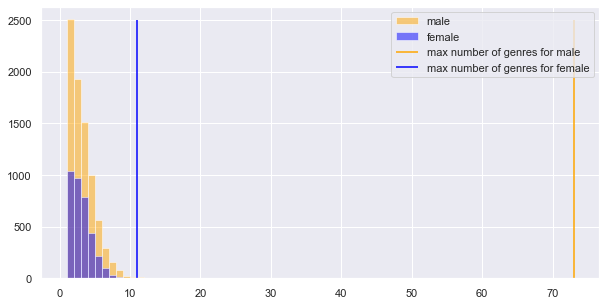

In [94]:
plt.figure(figsize = (10, 5))
plt.hist(data_male.genrelist_length, bins = range(1,max_num), density = False, color = 'orange', alpha = .5, label = 'male')
plt.vlines(x = max_num_male, ymin = 0 , ymax = 2500, label = 'max number of genres for male', color = 'orange')
plt.vlines(x = max_num_female, ymin = 0 , ymax = 2500, label = 'max number of genres for female', color = 'blue')
plt.hist(data_female.genrelist_length, bins = range(1,max_num), density = False, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Here are the histograms as densities: the heights are scaled so as the sum of all heights is 1.

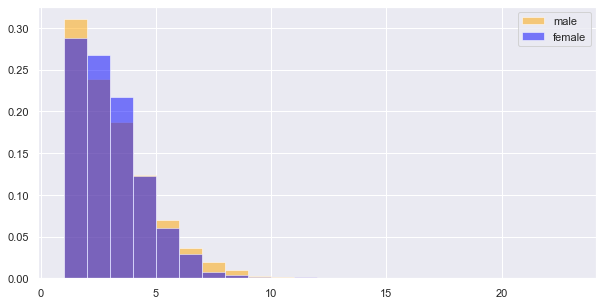

In [95]:
plt.figure(figsize = (10, 5))
plt.hist(data_male.genrelist_length, bins = range(1,24), density = True, color = 'orange', alpha = .5, label = 'male')
plt.hist(data_female.genrelist_length, bins = range(1,24), density = True, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Let's look at three bins: $[1, mean)$, $[mean,2*mean)$, $[2*mean,25]$

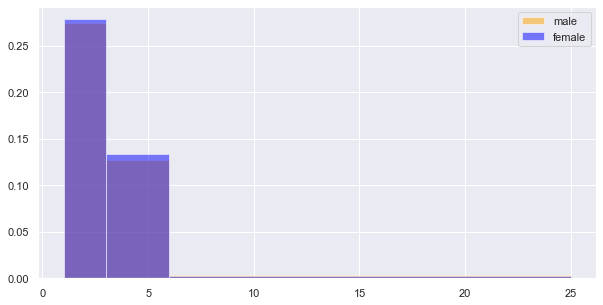

In [96]:
plt.figure(figsize = (10, 5))
plt.hist(data_male.genrelist_length, bins = [1,3,6,25], density = True, color = 'orange', alpha = .5, label = 'male')
plt.hist(data_female.genrelist_length, bins = [1,3,6,25], density = True, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

## What are the most common genre labels?

### Count the number of times that a label occurs:

In [103]:
genre_list_1 = data.genrelist.values.tolist()
genre_list_1 = [x for y in genre_list_1 for x in y]
df = pd.Series(genre_list_1)
label_value_counts = df.value_counts()

In [108]:
label_value_counts[:20]

Pop_music               1847
Country_music           1518
Rock_music              1263
Hip_hop_music           1046
Alternative_rock         970
Soul_music               960
Folk_music               955
Contemporary_R&amp;B     848
Jazz                     826
Blues                    705
Hard_rock                618
Pop_rock                 570
Indie_rock               483
Heavy_metal_music        461
Rhythm_and_blues         443
Punk_rock                406
Folk_rock                378
Gospel_music             332
Blues_rock               286
R&amp;B                  283
dtype: int64

In [106]:
label_value_counts.shape

(1616,)

Graph of how genres are distributed among artists

### Now let's count the most common genre labels for male and female... TBD

The unique values as a list:

In [120]:
genre_list = list(set(genre_list1))
print(f'There are {len(genre_list)} unique genre labels')

There are 1902 unique genre labels


### Let's take a look at which genre labels appear when there are at least G genre labels (G to be determined).

In [121]:
data.head()

,artist,gender,genre,genrelist,num_genres
0,12 Gauge,male,miami bass,[miami bass],1
1,1987,male,retro electro,[retro electro],1
2,2 Chainz,male,"atl hip hop, gangster rap, hip hop, pop rap, r...","[atl hip hop, gangster rap, hip hop, pop rap, ...",7
3,2 Pistols,male,"dirty south rap, pop rap, southern hip hop, trap","[dirty south rap, pop rap, southern hip hop, t...",4
4,21 Savage,male,"atl hip hop, rap, trap","[atl hip hop, rap, trap]",3


In [94]:
G = 5

In [95]:
data_many = data[data.num_genres > G]

In [96]:
data_many.shape

(1169, 5)

### List of genre labels that appear for artists with more than 5 labels:

In [97]:
# preliminary list of lists
genre_list_G = data_many.genrelist.values.tolist()

In [99]:
genre_list_G[:2]

[['atl hip hop',
  'gangster rap',
  'hip hop',
  'pop rap',
  'rap',
  'southern hip hop',
  'trap'],
 ['east coast hip hop',
  'gangster rap',
  'hip hop',
  'pop rap',
  'queens hip hop',
  'rap']]

In [100]:
# flatten the list of lists to a list
genre_list_G = [x for y in genre_list_G for x in y]

Count the number of times that a label occurs, filter out labels that occur less than 100 times

In [109]:
df = pd.Series(genre_list_G)
df.value_counts()[df.value_counts() > 99]

rap                   177
hip hop               160
folk                  160
folk rock             158
dance pop             156
pop rap               155
mellow gold           148
southern hip hop      144
country rock          130
gangster rap          127
roots rock            126
urban contemporary    122
soft rock             119
trap                  119
classic rock          113
pop                   112
rock                  110
traditional folk      109
adult standards       105
soul                  102
r&b                   101
dtype: int64

The unique values of these promiscuous genres:

In [113]:
genre_list_G_unique = list(set(genre_list_G))
print(f'There are {len(genre_list_G_unique)} unique genre labels used for artists with at least 6 labels')

There are 787 unique genre labels used for artists with at least 6 labels


We also want to look at these in terms of gender...

In [3]:
df = pd.read_csv('../../data/women_in_rock.csv')
df

,artist,genre
0,Big Mama Thornton,"acoustic blues, blues, electric blues, harmoni..."
1,LaVern Baker,"brill building pop, doo-wop, jump blues, rhyth..."
2,Ruth Brown,"jazz blues, jump blues, rhythm and blues, rock..."
3,Etta James,"adult standards, jazz blues, soul, soul blues,..."
4,Janis Martin,"rhythm and blues, rock-and-roll, rockabilly"
...,...,...
121,the Donnas,"candy pop, garage rock, glam punk, power-pop punk"
122,Dolores O'Riordan,"limerick indie, pop rock"
123,Mystic,"dark trap, emo rap, underground hip hop"
124,Pink,"album rock, art rock, classic rock, progressiv..."


Take a look at a new version of the Kaggle data:

In [17]:
df = pd.read_csv('../../data/kaggle_genres_rough.csv',  encoding = 'latin-1')

In [18]:
df.shape

(23177, 6)

In [19]:
df.head()

,Unnamed: 0,artist,gender,category,retrieved,genre
0,0,12 Gauge,male,African-American_male_rappers,12 Gauge,['miami bass']
1,1,1987,male,Swedish_male_singers,Cartridge 1987,['retro electro']
2,2,2 Chainz,male,African-American_male_rappers,2 Chainz,"['atl hip hop', 'gangster rap', 'hip hop', 'po..."
3,3,2 Pistols,male,African-American_male_rappers,2 Pistols,"['dirty south rap', 'pop rap', 'southern hip h..."
4,4,21 Savage,male,African-American_male_rappers,21 Savage,"['atl hip hop', 'rap', 'trap']"


In [20]:
n = np.random.randint(df.shape[0])
df.retrieved.iloc[n]

'Henry Whitter'

In [25]:
df_with_genre = df[df.retrieved != 'none']

In [26]:
df_with_genre.head()

,Unnamed: 0,artist,gender,category,retrieved,genre
0,0,12 Gauge,male,African-American_male_rappers,12 Gauge,['miami bass']
1,1,1987,male,Swedish_male_singers,Cartridge 1987,['retro electro']
2,2,2 Chainz,male,African-American_male_rappers,2 Chainz,"['atl hip hop', 'gangster rap', 'hip hop', 'po..."
3,3,2 Pistols,male,African-American_male_rappers,2 Pistols,"['dirty south rap', 'pop rap', 'southern hip h..."
4,4,21 Savage,male,African-American_male_rappers,21 Savage,"['atl hip hop', 'rap', 'trap']"


In [34]:
df_with_genre[df_with_genre.retrieved == 'none']

,Unnamed: 0,artist,gender,category,retrieved,genre


In [35]:
df_with_genre.shape

(19632, 6)

In [36]:
equal = (df_with_genre.retrieved == df_with_genre.artist)

In [37]:
equal.shape

(19632,)

In [38]:
equal.sum()

16205

In [39]:
df_equal = df_with_genre[equal]
df_equal.artist.unique().shape

(16205,)

In [40]:
df_equal.genre.unique()

array(["['miami bass']",
       "['atl hip hop', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']",
       "['dirty south rap', 'pop rap', 'southern hip hop', 'trap']", ...,
       "['chanson', 'french indie pop', 'french indietronica', 'french pop', 'french rock', 'nouvelle chanson francaise']",
       "['cuban rumba', 'trova']",
       "['classic norwegian pop', 'danseband', 'norwegian rock']"],
      dtype=object)

In [43]:
df_equal.genre.isnull().sum()

0